In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# Load data from Excel file
data = pd.read_excel('traindata_v2.xlsx')

# Ensure 'Time' is numeric
data['Time'] = pd.to_numeric(data['Time'], errors='coerce')  # Convert strings, set invalid to NaN
data.dropna(subset=['Time'], inplace=True)  # Remove rows where 'Time' couldn't be converted

# Function to convert decimal time to HHMM format
def decimal_to_hhmm(decimal_times):
    decimal_times = np.clip(decimal_times, 0, 0.9999)  # Ensure values are valid
    hours = (decimal_times * 24).astype(int)  # Extract hours
    minutes = ((decimal_times * 24 - hours) * 60).astype(int)  # Extract minutes
    return hours, minutes  # Return hour and minute components

# Apply conversion to get hours and minutes
data['Hour'], data['Minute'] = decimal_to_hhmm(data['Time'])

# Feature engineering: Creating cyclical features for hour and minute
# Skip first row to avoid NaN issues in cyclical feature transformations
data.loc[1:, 'Hour_sin'] = np.sin(2 * np.pi * (data.loc[1:, 'Hour']) / 24)  # Sin for hour
data.loc[1:, 'Hour_cos'] = np.cos(2 * np.pi * (data.loc[1:, 'Hour']) / 24)  # Cos for hour
data.loc[1:, 'Minute_sin'] = np.sin(2 * np.pi * (data.loc[1:, 'Minute']) / 60)  # Sin for minute
data.loc[1:, 'Minute_cos'] = np.cos(2 * np.pi * (data.loc[1:, 'Minute']) / 60)  # Cos for minute

# Check the new features created
print(data[['Hour', 'Minute', 'Hour_sin', 'Hour_cos', 'Minute_sin', 'Minute_cos']].head())


# Check out what the formatted data looks like
data.head()

   Hour  Minute  Hour_sin  Hour_cos  Minute_sin    Minute_cos
1     0       5       0.0       1.0    0.500000  8.660254e-01
2     0      10       0.0       1.0    0.866025  5.000000e-01
3     0      15       0.0       1.0    1.000000  2.832769e-16
4     0      20       0.0       1.0    0.866025 -5.000000e-01
5     0      25       0.0       1.0    0.500000 -8.660254e-01


,Year,Date,Time,Pressure,Air Temp,Relative Humidity,Wind Speed,Wind Direction,Incoming Radiation,Rainfall,Hour,Minute,Hour_sin,Hour_cos,Minute_sin,Minute_cos
1,2016.0,2024-09-05,0.003472,100.4,27.40,78.5,0.2,34.95,0.000,0.0,0,5,0.0,1.0,0.500000,8.660254e-01
2,2016.0,2024-09-05,0.006944,100.4,27.27,79.0,0.2,57.16,0.049,0.0,0,10,0.0,1.0,0.866025,5.000000e-01
3,2016.0,2024-09-05,0.010417,100.4,27.11,79.2,0.2,78.80,0.049,0.0,0,15,0.0,1.0,1.000000,2.832769e-16
4,2016.0,2024-09-05,0.013889,100.4,27.01,79.3,0.2,68.40,0.000,0.0,0,20,0.0,1.0,0.866025,-5.000000e-01
5,2016.0,2024-09-05,0.017361,100.4,27.14,79.3,0.2,68.49,0.000,0.0,0,25,0.0,1.0,0.500000,-8.660254e-01


In [3]:
# Separate features and target variable
# Separate features and target variable (now including the new cyclical features)
input_features = data[['Time', 'Pressure', 'Air Temp', 'Relative Humidity', 'Wind Speed', 'Rainfall',
                       'Hour_sin', 'Hour_cos', 'Minute_sin', 'Minute_cos']].values

output_variable = data['Incoming Radiation'].values.reshape(-1, 1)
output_variable = data['Incoming Radiation'].values.reshape(-1, 1)

# Look at what the features look like
print(input_features)
print(output_variable)

[[ 3.47222222e-03  1.00400000e+02  2.74000000e+01 ...  1.00000000e+00
   5.00000000e-01  8.66025404e-01]
 [ 6.94444444e-03  1.00400000e+02  2.72700000e+01 ...  1.00000000e+00
   8.66025404e-01  5.00000000e-01]
 [ 1.04166667e-02  1.00400000e+02  2.71100000e+01 ...  1.00000000e+00
   1.00000000e+00  2.83276945e-16]
 ...
 [ 9.93055556e-01  1.00200000e+02  2.66000000e+01 ...  9.65925826e-01
  -8.66025404e-01  5.00000000e-01]
 [ 9.96527778e-01  1.00200000e+02  2.66700000e+01 ...  9.65925826e-01
  -5.00000000e-01  8.66025404e-01]
 [ 1.00000000e+00  1.00200000e+02  2.67000000e+01 ...  9.65925826e-01
  -1.04528463e-01  9.94521895e-01]]
[[0.   ]
 [0.049]
 [0.049]
 ...
 [0.   ]
 [0.049]
 [0.049]]


In [4]:
# Normalize all features (including new cyclical features)
scaler_input = MinMaxScaler()
P = scaler_input.fit_transform(input_features)

# Normalize the target variable
scaler_output = MinMaxScaler()
T = scaler_output.fit_transform(output_variable)

# Look at what the final training data looks like
print(P)
print(T)

[[0.         0.85714286 0.58205431 ... 1.         0.75       0.9330127 ]
 [0.00348432 0.85714286 0.56670602 ... 1.         0.9330127  0.75      ]
 [0.00696864 0.85714286 0.54781582 ... 1.         1.         0.5       ]
 ...
 [0.99303136 0.57142857 0.48760331 ... 0.98296291 0.0669873  0.75      ]
 [0.99651568 0.57142857 0.49586777 ... 0.98296291 0.25       0.9330127 ]
 [1.         0.57142857 0.49940968 ... 0.98296291 0.44773577 0.99726095]]
[[0.00000000e+00]
 [6.11735331e-05]
 [6.11735331e-05]
 ...
 [0.00000000e+00]
 [6.11735331e-05]
 [6.11735331e-05]]


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Input

# Split the data into training (first 1820 time steps) and testing (remaining time steps)
train_data = P[:1820]
train_label = T[:1820]
P_test = P[1820:]
T_test = T[1820:]

# Reshape input data to 3D format (samples, time steps, features)
train_data = train_data.reshape((train_data.shape[0], 1, train_data.shape[1]))
P_test = P_test.reshape((P_test.shape[0], 1, P_test.shape[1]))

# Define the number of features and responses
num_features = input_features.shape[1]
num_responses = 1

model = Sequential([
    Input(shape=(1, num_features)),  # Explicit Input layer
    LSTM(100),
    Dense(num_responses)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_data, train_label, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0418 - val_loss: 0.0219
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0280 - val_loss: 0.0235
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0260 - val_loss: 0.0230
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242 - val_loss: 0.0285
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0252 - val_loss: 0.0240
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0225 - val_loss: 0.0255
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0252 - val_loss: 0.0232
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0226 - val_loss: 0.0296
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0221 - val_loss: 0.0263
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0234 - val_loss: 0.0225
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 - val_loss: 0.0216
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Root Mean Squared Error (RMSE): 189.7510751322526


Text(0, 0.5, 'Loss')

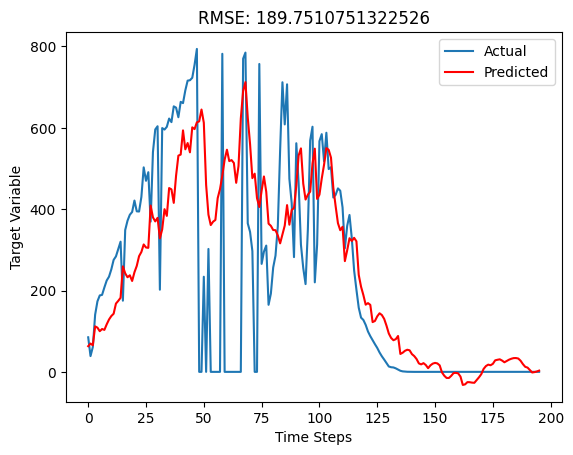

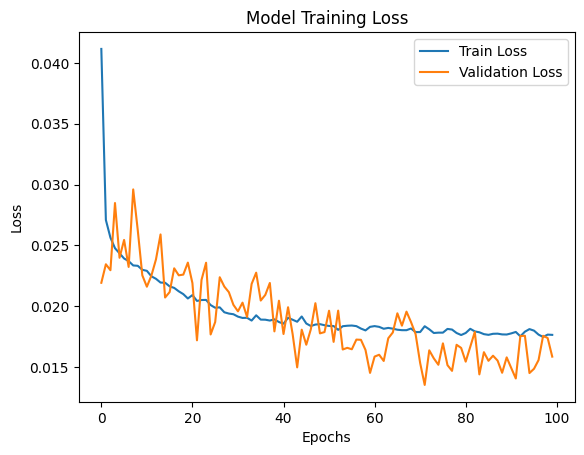

In [6]:
# Make predictions on the test set
predictions = model.predict(P_test)

# Reverse map the normalized predictions and targets to their original scales
YPred = scaler_output.inverse_transform(predictions)
YTest = scaler_output.inverse_transform(T_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean((YPred - YTest)**2))

# Plot the actual and predicted values
plt.figure()
plt.plot(YTest, label='Actual')
plt.plot(YPred, 'r', label='Predicted')
plt.legend(['Actual', 'Predicted'])
plt.title(f'RMSE: {rmse}')
plt.xlabel('Time Steps')
plt.ylabel('Target Variable')

# Display RMSE value
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot training and validation loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [9]:
# Save the entire model as an HDF5 file
model.save('LSTM_v2.keras')